# PRACTICE WITH TRANSFER FUNCTIONS

In [1]:
!pip -q install tellurium
!pip -q install control

In [2]:
import numpy as np
import pandas as pd
import tellurium as te
import control
import matplotlib.pyplot as plt

In [3]:
TIMES = np.linspace(0, 10, 100)

# Exercise 1: Sequential Network

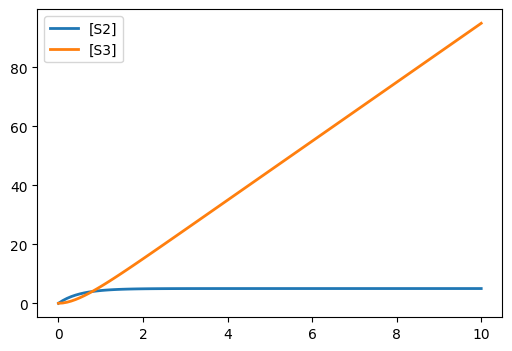

In [4]:
model1 = """
$S1 -> S2; k1*S1
S2 -> S3; k2*S2

S1 = 10
S2 = 0
S3 = 0
k1 = 1
k2 = 2
"""
RR = te.loada(model1)
DATA = RR.simulate(TIMES[0], TIMES[-1], len(TIMES))
RR.plot()

## System to analyze
* Input: $S_1$
* Output: $S_3$

## Step 1: Write the system equations
The system equations are the equations that describe the changes in the chemical species.

\begin{eqnarray}
\frac{dS_2}{dt} & = & k_1 S_1 - k_2 S_2 \\
\frac{d S_3}{dt} & = & k_2 S_2
\end{eqnarray}

## Step 2: Take the Laplace transform of the system equations

Property P1: The Laplace transform of the derivative is $s$ times its Laplace transform.

\begin{eqnarray}
s S_2 (s) & = & k_1 S_1 (s) - k_2 S_2 (s) \\
s S_3 (s) & = & k_2 S_2 (s)
\end{eqnarray}

## Step 3: Solve for the output in terms of the input.

\begin{eqnarray}
s S_2 (s) & = & k_1 S_1 (s) - k_2 S_2 (s) \\
S_2 (s) & = & \frac{k_1 S_1 (s)}{s + k_2}
\end{eqnarray}

\begin{eqnarray}
s S_3 (s) & = & k_2 S_2 (s) \\
S_3 (s) & = & \frac{k_2 S_2 (s)}{s}
\end{eqnarray}

## Step 4: Do backwards substitutions

\begin{eqnarray}
S_3 (s) & = & \frac{k_2 S_2 (s)}{s} \\
  & = &  \frac{k_1 k_2 S_1 (s)}{s(s + k_2)} \\
G(s) & = & \frac{S_3(s)}{S_1 (s)} \\
& = & \frac{k_1 k_2}{s (s + k_2)}
\end{eqnarray}

## Check your transfer function
Use the python control library to predict a step response. The transfer function is expressed as a numerator polynomial in $s$ and a denominator polynomial in $s$.

In [5]:
s = control.TransferFunction.s
k1 = RR["k1"]
k2 = RR["k2"]
scale = RR["S1"]
tf = scale*k1*k2/(s*(s+k2))
tf

TransferFunction(array([20.]), array([1., 2., 0.]))

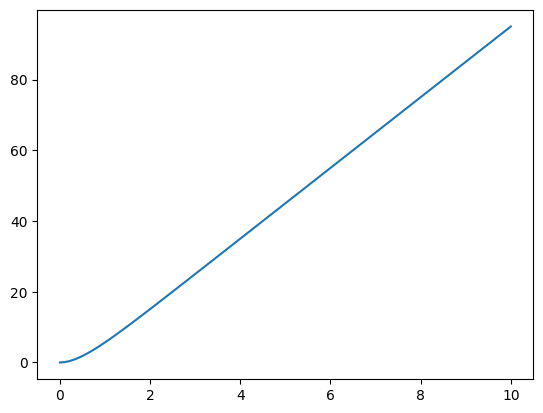

In [6]:
times, predictions = control.forced_response(tf, T=TIMES, U=1)
plt.plot(times, predictions)

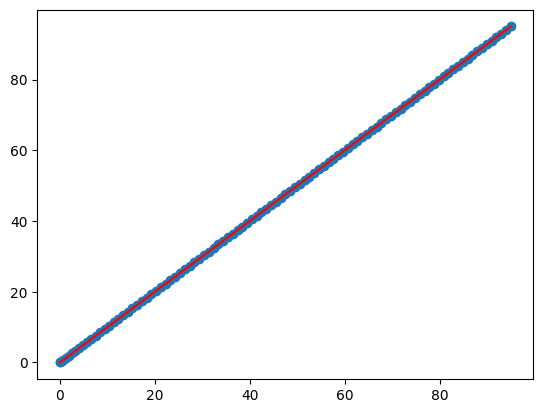

In [7]:
# Compare with simulation
plt.scatter(DATA["[S3]"], predictions)
maxval = np.max(predictions)
plt.plot([0, maxval], [0, maxval], color="red")

## Questions
1. What are the poles of the transfer function?
1. Is the system stable
1. What is the DC gain?

# Exercise 2: Sequential Network With Output Degradation

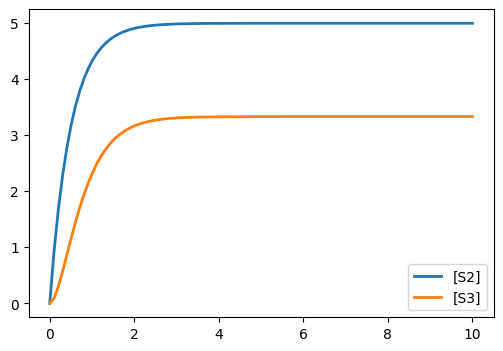

In [8]:
model2 = """
$S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> ; k3*S3

S1 = 10
S2 = 0
S3 = 0
k1 = 1
k2 = 2
k3 = 3
"""
RR2 = te.loada(model2)
DATA2 = RR2.simulate(TIMES[0], TIMES[-1], len(TIMES))
RR2.plot()

## Step 1: Write the system equations

## Step 2: Take Laplace transforms of the system equations

## Step 3: Solve for the output in terms of the input

## Step 4: Do backwards substitution

## Step 5: Check your transfer function

## Questions
1. What are the poles of the transfer function?
1. Is the system stable
1. What is the DC gain?
1. What is the effect on the settling times and DC gain if
  1. $k_1$ is increased?
  1. $k_2$ is decreased?